In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk
import pandas as pd
import random
import math

C:\Users\shayan\AppData\Local\Temp\ipykernel_21240\4166170531.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Read Customers.csv file

In [2]:
cust_df = pd.read_csv('Customers.csv')
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import StandardScaler
cust_df = cust_df.values[:,[3,4]]
cust_df_income = cust_df[:,0]
cust_df_Score = cust_df[:,1]

cust_df

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

In [4]:
center_points=cust_df[np.random.choice(cust_df.shape[0],size=5,replace=False)]

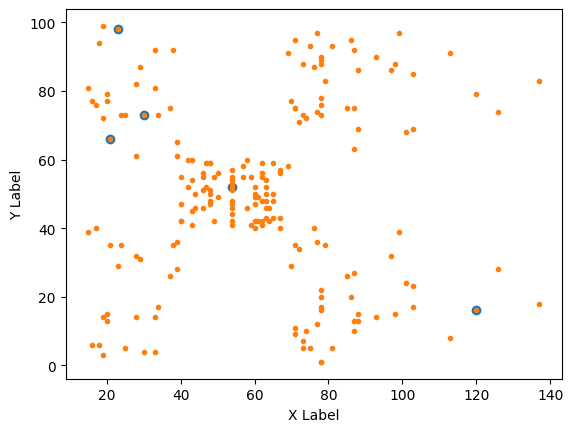

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(center_points[:,0], center_points[:,1], marker='o')
ax.scatter(cust_df_income, cust_df_Score, marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

In [6]:
def distance_3D(center_point,node):
    return math.sqrt(((center_point[0]-node[0])**2)+((center_point[1]-node[1])**2))

In [67]:
clustering_arra=[]

for node in cust_df:
    arra=[]
    for center_point in center_points:
        a=distance_3D(center_point,node)
        arra.append(a)
    clustering_arra.append(arra.index(min(arra)))

In [68]:
cust_df=np.c_[ cust_df, clustering_arra ] 

In [69]:
cluster0=cust_df[cust_df[:, -1] == 0, :]
cluster1=cust_df[cust_df[:, -1] == 1, :]
cluster2=cust_df[cust_df[:, -1] == 2, :]
cluster3=cust_df[cust_df[:, -1] == 3, :]
cluster4=cust_df[cust_df[:, -1] == 4, :]

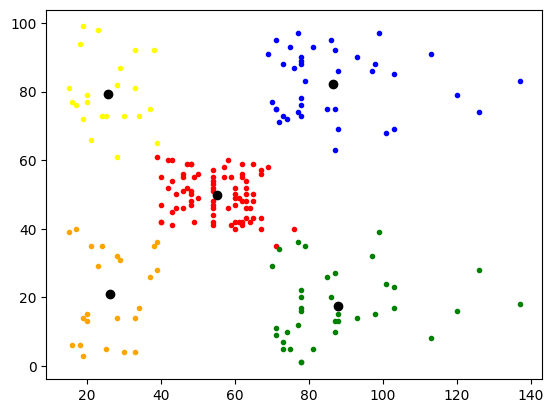

In [70]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(cluster0[:,0],cluster0[:,1],color='red',label='Group 1',marker='.')
plt.scatter(cluster1[:,0],cluster1[:,1],color='yellow',label='Group 2',marker='.')
plt.scatter(cluster2[:,0],cluster2[:,1],color='blue',label='Group 3',marker='.')
plt.scatter(cluster3[:,0],cluster3[:,1],color='green',label='Group 4',marker='.')
plt.scatter(cluster4[:,0],cluster4[:,1],color='orange',label='Group 5',marker='.')

ax.scatter( center_points[:,0] ,center_points[:,1], marker='o',color="black")


In [71]:
import statistics
center_points=np.array( [[statistics.mean(cluster0[:, 0]),statistics.mean(cluster0[:, 1])],
                [statistics.mean(cluster1[:, 0]),statistics.mean(cluster1[:, 1])],
                [statistics.mean(cluster2[:, 0]),statistics.mean(cluster2[:, 1])],
                [statistics.mean(cluster3[:, 0]),statistics.mean(cluster3[:, 1])],
                [statistics.mean(cluster4[:, 0]),statistics.mean(cluster4[:, 1])]
              ])